# Manhattan

In [10]:
import numpy as np

manhattan = np.array([127, 128, 153, 120, 243, 244, 116, 42, 152, 166, 41, 74, 194, 24, 151,
                      238, 75, 239, 43, 236, 263, 143, 142, 262, 50, 237, 141, 140, 202, 163,
                      48, 230, 161, 162, 229, 246, 100, 68, 186, 233, 164, 170, 90, 234, 137,
                      158, 249, 107, 113, 224, 114, 125, 79, 211, 4, 144, 231, 148, 232, 13,
                      261, 45, 209, 87, 12, 88, 105, 104, 103])

# 2012

In [30]:
import pandas as pd

data = pd.read_parquet('yellow_tripdata_2012-01.parquet', engine = 'pyarrow')
data = data.drop(['VendorID', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID',
                  'store_and_fwd_flag', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
                  'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 
                  'airport_fee'], axis = 1)

data = data.loc[data['PULocationID'].isin(manhattan)]
data = data.loc[data['DOLocationID'].isin(manhattan)]
data.insert(3, "day", pd.DatetimeIndex(data['tpep_pickup_datetime']).day.values, True)
data = data.drop(['tpep_pickup_datetime'], axis = 1)
trip = data.groupby(['PULocationID', 'DOLocationID', 'day'])['day'].count().reset_index(name = 'count')
tensor = np.zeros((69, 69, max(trip.day.values)))
trip = trip.values
for j in range(trip.shape[0]):
    tensor[np.where(manhattan == trip[j, 0])[0][0], 
           np.where(manhattan == trip[j, 1])[0][0], trip[j, 2] - 1] = trip[j, 3]

In [31]:
for month in range(2, 13):
    if month < 10:
        data = pd.read_parquet('yellow_tripdata_2012-0{}.parquet'.format(month), engine = 'pyarrow')
    else:
        data = pd.read_parquet('yellow_tripdata_2012-{}.parquet'.format(month), engine = 'pyarrow')
    data = data.drop(['VendorID', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID',
                      'store_and_fwd_flag', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
                      'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 
                      'airport_fee'], axis = 1)

    data = data.loc[data['PULocationID'].isin(manhattan)]
    data = data.loc[data['DOLocationID'].isin(manhattan)]
    data.insert(3, "day", pd.DatetimeIndex(data['tpep_pickup_datetime']).day.values, True)
    data = data.drop(['tpep_pickup_datetime'], axis = 1)
    trip = data.groupby(['PULocationID', 'DOLocationID', 'day'])['day'].count().reset_index(name = 'count')
    tensor_new = np.zeros((69, 69, max(trip.day.values)))
    trip = trip.values
    for j in range(trip.shape[0]):
        tensor_new[np.where(manhattan == trip[j, 0])[0][0], 
                   np.where(manhattan == trip[j, 1])[0][0], trip[j, 2] - 1] = trip[j, 3]
    tensor = np.append(tensor, tensor_new, axis = 2)

In [33]:
tensor.shape

(69, 69, 366)

In [36]:
np.savez_compressed('yellow_taxi_trip_2012.npz', tensor)

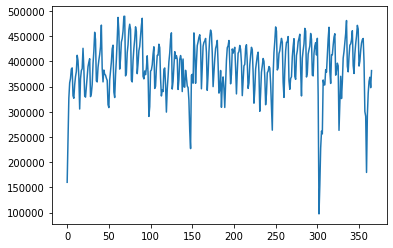

In [35]:
import matplotlib.pyplot as plt

plt.plot(np.sum(np.sum(tensor, axis = 0), axis = 0))
plt.show()

# 2013

In [39]:
import pandas as pd

data = pd.read_parquet('yellow_tripdata_2013-01.parquet', engine = 'pyarrow')
data = data.drop(['VendorID', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID',
                  'store_and_fwd_flag', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
                  'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 
                  'airport_fee'], axis = 1)

data = data.loc[data['PULocationID'].isin(manhattan)]
data = data.loc[data['DOLocationID'].isin(manhattan)]
data.insert(3, "day", pd.DatetimeIndex(data['tpep_pickup_datetime']).day.values, True)
data = data.drop(['tpep_pickup_datetime'], axis = 1)
trip = data.groupby(['PULocationID', 'DOLocationID', 'day'])['day'].count().reset_index(name = 'count')
tensor = np.zeros((69, 69, max(trip.day.values)))
trip = trip.values
for j in range(trip.shape[0]):
    tensor[np.where(manhattan == trip[j, 0])[0][0], 
           np.where(manhattan == trip[j, 1])[0][0], trip[j, 2] - 1] = trip[j, 3]

In [40]:
for month in range(2, 13):
    if month < 10:
        data = pd.read_parquet('yellow_tripdata_2013-0{}.parquet'.format(month), engine = 'pyarrow')
    else:
        data = pd.read_parquet('yellow_tripdata_2013-{}.parquet'.format(month), engine = 'pyarrow')
    data = data.drop(['VendorID', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID',
                      'store_and_fwd_flag', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
                      'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 
                      'airport_fee'], axis = 1)

    data = data.loc[data['PULocationID'].isin(manhattan)]
    data = data.loc[data['DOLocationID'].isin(manhattan)]
    data.insert(3, "day", pd.DatetimeIndex(data['tpep_pickup_datetime']).day.values, True)
    data = data.drop(['tpep_pickup_datetime'], axis = 1)
    trip = data.groupby(['PULocationID', 'DOLocationID', 'day'])['day'].count().reset_index(name = 'count')
    tensor_new = np.zeros((69, 69, max(trip.day.values)))
    trip = trip.values
    for j in range(trip.shape[0]):
        tensor_new[np.where(manhattan == trip[j, 0])[0][0], 
                   np.where(manhattan == trip[j, 1])[0][0], trip[j, 2] - 1] = trip[j, 3]
    tensor = np.append(tensor, tensor_new, axis = 2)

In [41]:
tensor.shape

(69, 69, 365)

In [42]:
np.savez_compressed('yellow_taxi_trip_2013.npz', tensor)

# 2014

In [43]:
import pandas as pd

data = pd.read_parquet('yellow_tripdata_2014-01.parquet', engine = 'pyarrow')
data = data.drop(['VendorID', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID',
                  'store_and_fwd_flag', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
                  'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 
                  'airport_fee'], axis = 1)

data = data.loc[data['PULocationID'].isin(manhattan)]
data = data.loc[data['DOLocationID'].isin(manhattan)]
data.insert(3, "day", pd.DatetimeIndex(data['tpep_pickup_datetime']).day.values, True)
data = data.drop(['tpep_pickup_datetime'], axis = 1)
trip = data.groupby(['PULocationID', 'DOLocationID', 'day'])['day'].count().reset_index(name = 'count')
tensor = np.zeros((69, 69, max(trip.day.values)))
trip = trip.values
for j in range(trip.shape[0]):
    tensor[np.where(manhattan == trip[j, 0])[0][0], 
           np.where(manhattan == trip[j, 1])[0][0], trip[j, 2] - 1] = trip[j, 3]

In [44]:
for month in range(2, 13):
    if month < 10:
        data = pd.read_parquet('yellow_tripdata_2014-0{}.parquet'.format(month), engine = 'pyarrow')
    else:
        data = pd.read_parquet('yellow_tripdata_2014-{}.parquet'.format(month), engine = 'pyarrow')
    data = data.drop(['VendorID', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID',
                      'store_and_fwd_flag', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
                      'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 
                      'airport_fee'], axis = 1)

    data = data.loc[data['PULocationID'].isin(manhattan)]
    data = data.loc[data['DOLocationID'].isin(manhattan)]
    data.insert(3, "day", pd.DatetimeIndex(data['tpep_pickup_datetime']).day.values, True)
    data = data.drop(['tpep_pickup_datetime'], axis = 1)
    trip = data.groupby(['PULocationID', 'DOLocationID', 'day'])['day'].count().reset_index(name = 'count')
    tensor_new = np.zeros((69, 69, max(trip.day.values)))
    trip = trip.values
    for j in range(trip.shape[0]):
        tensor_new[np.where(manhattan == trip[j, 0])[0][0], 
                   np.where(manhattan == trip[j, 1])[0][0], trip[j, 2] - 1] = trip[j, 3]
    tensor = np.append(tensor, tensor_new, axis = 2)

In [45]:
tensor.shape

(69, 69, 365)

In [46]:
np.savez_compressed('yellow_taxi_trip_2014.npz', tensor)

# 2015

In [48]:
import pandas as pd

data = pd.read_parquet('yellow_tripdata_2015-01.parquet', engine = 'pyarrow')
data = data.drop(['VendorID', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID',
                  'store_and_fwd_flag', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
                  'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 
                  'airport_fee'], axis = 1)

data = data.loc[data['PULocationID'].isin(manhattan)]
data = data.loc[data['DOLocationID'].isin(manhattan)]
data.insert(3, "day", pd.DatetimeIndex(data['tpep_pickup_datetime']).day.values, True)
data = data.drop(['tpep_pickup_datetime'], axis = 1)
trip = data.groupby(['PULocationID', 'DOLocationID', 'day'])['day'].count().reset_index(name = 'count')
tensor = np.zeros((69, 69, max(trip.day.values)))
trip = trip.values
for j in range(trip.shape[0]):
    tensor[np.where(manhattan == trip[j, 0])[0][0], 
           np.where(manhattan == trip[j, 1])[0][0], trip[j, 2] - 1] = trip[j, 3]

for month in range(2, 13):
    if month < 10:
        data = pd.read_parquet('yellow_tripdata_2015-0{}.parquet'.format(month), engine = 'pyarrow')
    else:
        data = pd.read_parquet('yellow_tripdata_2015-{}.parquet'.format(month), engine = 'pyarrow')
    data = data.drop(['VendorID', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID',
                      'store_and_fwd_flag', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
                      'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 
                      'airport_fee'], axis = 1)

    data = data.loc[data['PULocationID'].isin(manhattan)]
    data = data.loc[data['DOLocationID'].isin(manhattan)]
    data.insert(3, "day", pd.DatetimeIndex(data['tpep_pickup_datetime']).day.values, True)
    data = data.drop(['tpep_pickup_datetime'], axis = 1)
    trip = data.groupby(['PULocationID', 'DOLocationID', 'day'])['day'].count().reset_index(name = 'count')
    tensor_new = np.zeros((69, 69, max(trip.day.values)))
    trip = trip.values
    for j in range(trip.shape[0]):
        tensor_new[np.where(manhattan == trip[j, 0])[0][0], 
                   np.where(manhattan == trip[j, 1])[0][0], trip[j, 2] - 1] = trip[j, 3]
    tensor = np.append(tensor, tensor_new, axis = 2)

tensor.shape

(69, 69, 365)

In [49]:
np.savez_compressed('yellow_taxi_trip_2015.npz', tensor)

# 2016

In [50]:
import pandas as pd

data = pd.read_parquet('yellow_tripdata_2016-01.parquet', engine = 'pyarrow')
data = data.drop(['VendorID', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID',
                  'store_and_fwd_flag', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
                  'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 
                  'airport_fee'], axis = 1)

data = data.loc[data['PULocationID'].isin(manhattan)]
data = data.loc[data['DOLocationID'].isin(manhattan)]
data.insert(3, "day", pd.DatetimeIndex(data['tpep_pickup_datetime']).day.values, True)
data = data.drop(['tpep_pickup_datetime'], axis = 1)
trip = data.groupby(['PULocationID', 'DOLocationID', 'day'])['day'].count().reset_index(name = 'count')
tensor = np.zeros((69, 69, max(trip.day.values)))
trip = trip.values
for j in range(trip.shape[0]):
    tensor[np.where(manhattan == trip[j, 0])[0][0], 
           np.where(manhattan == trip[j, 1])[0][0], trip[j, 2] - 1] = trip[j, 3]

for month in range(2, 13):
    if month < 10:
        data = pd.read_parquet('yellow_tripdata_2016-0{}.parquet'.format(month), engine = 'pyarrow')
    else:
        data = pd.read_parquet('yellow_tripdata_2016-{}.parquet'.format(month), engine = 'pyarrow')
    data = data.drop(['VendorID', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID',
                      'store_and_fwd_flag', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
                      'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 
                      'airport_fee'], axis = 1)

    data = data.loc[data['PULocationID'].isin(manhattan)]
    data = data.loc[data['DOLocationID'].isin(manhattan)]
    data.insert(3, "day", pd.DatetimeIndex(data['tpep_pickup_datetime']).day.values, True)
    data = data.drop(['tpep_pickup_datetime'], axis = 1)
    trip = data.groupby(['PULocationID', 'DOLocationID', 'day'])['day'].count().reset_index(name = 'count')
    tensor_new = np.zeros((69, 69, max(trip.day.values)))
    trip = trip.values
    for j in range(trip.shape[0]):
        tensor_new[np.where(manhattan == trip[j, 0])[0][0], 
                   np.where(manhattan == trip[j, 1])[0][0], trip[j, 2] - 1] = trip[j, 3]
    tensor = np.append(tensor, tensor_new, axis = 2)

tensor.shape

(69, 69, 366)

In [51]:
np.savez_compressed('yellow_taxi_trip_2016.npz', tensor)

# 2017

In [58]:
import pandas as pd

data = pd.read_parquet('yellow_tripdata_2017-01.parquet', engine = 'pyarrow')
data = data.drop(['VendorID', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID',
                  'store_and_fwd_flag', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
                  'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 
                  'airport_fee'], axis = 1)

data = data.loc[data['PULocationID'].isin(manhattan)]
data = data.loc[data['DOLocationID'].isin(manhattan)]
data.insert(3, "day", pd.DatetimeIndex(data['tpep_pickup_datetime']).day.values, True)
data = data.drop(['tpep_pickup_datetime'], axis = 1)
trip = data.groupby(['PULocationID', 'DOLocationID', 'day'])['day'].count().reset_index(name = 'count')
tensor = np.zeros((69, 69, 31))
trip = trip.values
for j in range(trip.shape[0]):
    tensor[np.where(manhattan == trip[j, 0])[0][0], 
           np.where(manhattan == trip[j, 1])[0][0], trip[j, 2] - 1] = trip[j, 3]

for month in range(2, 13):
    if month < 10:
        data = pd.read_parquet('yellow_tripdata_2017-0{}.parquet'.format(month), engine = 'pyarrow')
    else:
        data = pd.read_parquet('yellow_tripdata_2017-{}.parquet'.format(month), engine = 'pyarrow')
    data = data.drop(['VendorID', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID',
                      'store_and_fwd_flag', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
                      'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 
                      'airport_fee'], axis = 1)

    data = data.loc[data['PULocationID'].isin(manhattan)]
    data = data.loc[data['DOLocationID'].isin(manhattan)]
    data.insert(3, "day", pd.DatetimeIndex(data['tpep_pickup_datetime']).day.values, True)
    data = data.drop(['tpep_pickup_datetime'], axis = 1)
    trip = data.groupby(['PULocationID', 'DOLocationID', 'day'])['day'].count().reset_index(name = 'count')
    if month == 4 or month == 6 or month == 9 or month == 11:
        tensor_new = np.zeros((69, 69, 30))
    elif month == 3 or month == 5 or month == 7 or month == 8 or month == 10 or month == 12:
        tensor_new = np.zeros((69, 69, 31))
    elif month == 2:
        tensor_new = np.zeros((69, 69, 28))
    trip = trip.values
    for j in range(trip.shape[0]):
        if trip[j, 2] <= tensor_new.shape[2]:
            tensor_new[np.where(manhattan == trip[j, 0])[0][0], 
                       np.where(manhattan == trip[j, 1])[0][0], trip[j, 2] - 1] = trip[j, 3]
    tensor = np.append(tensor, tensor_new, axis = 2)

tensor.shape

(69, 69, 365)

In [59]:
np.savez_compressed('yellow_taxi_trip_2017.npz', tensor)

# 2018

In [61]:
import pandas as pd

data = pd.read_parquet('yellow_tripdata_2018-01.parquet', engine = 'pyarrow')
data = data.drop(['VendorID', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID',
                  'store_and_fwd_flag', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
                  'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 
                  'airport_fee'], axis = 1)

data = data.loc[data['PULocationID'].isin(manhattan)]
data = data.loc[data['DOLocationID'].isin(manhattan)]
data.insert(3, "day", pd.DatetimeIndex(data['tpep_pickup_datetime']).day.values, True)
data = data.drop(['tpep_pickup_datetime'], axis = 1)
trip = data.groupby(['PULocationID', 'DOLocationID', 'day'])['day'].count().reset_index(name = 'count')
tensor = np.zeros((69, 69, 31))
trip = trip.values
for j in range(trip.shape[0]):
    tensor[np.where(manhattan == trip[j, 0])[0][0], 
           np.where(manhattan == trip[j, 1])[0][0], trip[j, 2] - 1] = trip[j, 3]

for month in range(2, 13):
    if month < 10:
        data = pd.read_parquet('yellow_tripdata_2018-0{}.parquet'.format(month), engine = 'pyarrow')
    else:
        data = pd.read_parquet('yellow_tripdata_2018-{}.parquet'.format(month), engine = 'pyarrow')
    data = data.drop(['VendorID', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID',
                      'store_and_fwd_flag', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
                      'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 
                      'airport_fee'], axis = 1)

    data = data.loc[data['PULocationID'].isin(manhattan)]
    data = data.loc[data['DOLocationID'].isin(manhattan)]
    data.insert(3, "day", pd.DatetimeIndex(data['tpep_pickup_datetime']).day.values, True)
    data = data.drop(['tpep_pickup_datetime'], axis = 1)
    trip = data.groupby(['PULocationID', 'DOLocationID', 'day'])['day'].count().reset_index(name = 'count')
    if month == 4 or month == 6 or month == 9 or month == 11:
        tensor_new = np.zeros((69, 69, 30))
    elif month == 3 or month == 5 or month == 7 or month == 8 or month == 10 or month == 12:
        tensor_new = np.zeros((69, 69, 31))
    elif month == 2:
        tensor_new = np.zeros((69, 69, 28))
    trip = trip.values
    for j in range(trip.shape[0]):
        if trip[j, 2] <= tensor_new.shape[2]:
            tensor_new[np.where(manhattan == trip[j, 0])[0][0], 
                       np.where(manhattan == trip[j, 1])[0][0], trip[j, 2] - 1] = trip[j, 3]
    tensor = np.append(tensor, tensor_new, axis = 2)

tensor.shape

(69, 69, 365)

In [62]:
np.savez_compressed('yellow_taxi_trip_2018.npz', tensor)

# 2019

In [63]:
import pandas as pd

data = pd.read_parquet('yellow_tripdata_2019-01.parquet', engine = 'pyarrow')
data = data.drop(['VendorID', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID',
                  'store_and_fwd_flag', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
                  'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 
                  'airport_fee'], axis = 1)

data = data.loc[data['PULocationID'].isin(manhattan)]
data = data.loc[data['DOLocationID'].isin(manhattan)]
data.insert(3, "day", pd.DatetimeIndex(data['tpep_pickup_datetime']).day.values, True)
data = data.drop(['tpep_pickup_datetime'], axis = 1)
trip = data.groupby(['PULocationID', 'DOLocationID', 'day'])['day'].count().reset_index(name = 'count')
tensor = np.zeros((69, 69, 31))
trip = trip.values
for j in range(trip.shape[0]):
    tensor[np.where(manhattan == trip[j, 0])[0][0], 
           np.where(manhattan == trip[j, 1])[0][0], trip[j, 2] - 1] = trip[j, 3]

for month in range(2, 13):
    if month < 10:
        data = pd.read_parquet('yellow_tripdata_2019-0{}.parquet'.format(month), engine = 'pyarrow')
    else:
        data = pd.read_parquet('yellow_tripdata_2019-{}.parquet'.format(month), engine = 'pyarrow')
    data = data.drop(['VendorID', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID',
                      'store_and_fwd_flag', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
                      'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 
                      'airport_fee'], axis = 1)

    data = data.loc[data['PULocationID'].isin(manhattan)]
    data = data.loc[data['DOLocationID'].isin(manhattan)]
    data.insert(3, "day", pd.DatetimeIndex(data['tpep_pickup_datetime']).day.values, True)
    data = data.drop(['tpep_pickup_datetime'], axis = 1)
    trip = data.groupby(['PULocationID', 'DOLocationID', 'day'])['day'].count().reset_index(name = 'count')
    if month == 4 or month == 6 or month == 9 or month == 11:
        tensor_new = np.zeros((69, 69, 30))
    elif month == 3 or month == 5 or month == 7 or month == 8 or month == 10 or month == 12:
        tensor_new = np.zeros((69, 69, 31))
    elif month == 2:
        tensor_new = np.zeros((69, 69, 28))
    trip = trip.values
    for j in range(trip.shape[0]):
        if trip[j, 2] <= tensor_new.shape[2]:
            tensor_new[np.where(manhattan == trip[j, 0])[0][0], 
                       np.where(manhattan == trip[j, 1])[0][0], trip[j, 2] - 1] = trip[j, 3]
    tensor = np.append(tensor, tensor_new, axis = 2)

tensor.shape

(69, 69, 365)

In [64]:
np.savez_compressed('yellow_taxi_trip_2019.npz', tensor)

# 2020

In [66]:
import pandas as pd

data = pd.read_parquet('yellow_tripdata_2020-01.parquet', engine = 'pyarrow')
data = data.drop(['VendorID', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID',
                  'store_and_fwd_flag', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
                  'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 
                  'airport_fee'], axis = 1)

data = data.loc[data['PULocationID'].isin(manhattan)]
data = data.loc[data['DOLocationID'].isin(manhattan)]
data.insert(3, "day", pd.DatetimeIndex(data['tpep_pickup_datetime']).day.values, True)
data = data.drop(['tpep_pickup_datetime'], axis = 1)
trip = data.groupby(['PULocationID', 'DOLocationID', 'day'])['day'].count().reset_index(name = 'count')
tensor = np.zeros((69, 69, 31))
trip = trip.values
for j in range(trip.shape[0]):
    tensor[np.where(manhattan == trip[j, 0])[0][0], 
           np.where(manhattan == trip[j, 1])[0][0], trip[j, 2] - 1] = trip[j, 3]

for month in range(2, 13):
    if month < 10:
        data = pd.read_parquet('yellow_tripdata_2020-0{}.parquet'.format(month), engine = 'pyarrow')
    else:
        data = pd.read_parquet('yellow_tripdata_2020-{}.parquet'.format(month), engine = 'pyarrow')
    data = data.drop(['VendorID', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID',
                      'store_and_fwd_flag', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
                      'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 
                      'airport_fee'], axis = 1)

    data = data.loc[data['PULocationID'].isin(manhattan)]
    data = data.loc[data['DOLocationID'].isin(manhattan)]
    data.insert(3, "day", pd.DatetimeIndex(data['tpep_pickup_datetime']).day.values, True)
    data = data.drop(['tpep_pickup_datetime'], axis = 1)
    trip = data.groupby(['PULocationID', 'DOLocationID', 'day'])['day'].count().reset_index(name = 'count')
    if month == 4 or month == 6 or month == 9 or month == 11:
        tensor_new = np.zeros((69, 69, 30))
    elif month == 3 or month == 5 or month == 7 or month == 8 or month == 10 or month == 12:
        tensor_new = np.zeros((69, 69, 31))
    elif month == 2:
        tensor_new = np.zeros((69, 69, 29))
    trip = trip.values
    for j in range(trip.shape[0]):
        if trip[j, 2] <= tensor_new.shape[2]:
            tensor_new[np.where(manhattan == trip[j, 0])[0][0], 
                       np.where(manhattan == trip[j, 1])[0][0], trip[j, 2] - 1] = trip[j, 3]
    tensor = np.append(tensor, tensor_new, axis = 2)

tensor.shape

(69, 69, 366)

In [67]:
np.savez_compressed('yellow_taxi_trip_2020.npz', tensor)

# 2021

In [68]:
import pandas as pd

data = pd.read_parquet('yellow_tripdata_2021-01.parquet', engine = 'pyarrow')
data = data.drop(['VendorID', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID',
                  'store_and_fwd_flag', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
                  'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 
                  'airport_fee'], axis = 1)

data = data.loc[data['PULocationID'].isin(manhattan)]
data = data.loc[data['DOLocationID'].isin(manhattan)]
data.insert(3, "day", pd.DatetimeIndex(data['tpep_pickup_datetime']).day.values, True)
data = data.drop(['tpep_pickup_datetime'], axis = 1)
trip = data.groupby(['PULocationID', 'DOLocationID', 'day'])['day'].count().reset_index(name = 'count')
tensor = np.zeros((69, 69, 31))
trip = trip.values
for j in range(trip.shape[0]):
    tensor[np.where(manhattan == trip[j, 0])[0][0], 
           np.where(manhattan == trip[j, 1])[0][0], trip[j, 2] - 1] = trip[j, 3]

for month in range(2, 13):
    if month < 10:
        data = pd.read_parquet('yellow_tripdata_2021-0{}.parquet'.format(month), engine = 'pyarrow')
    else:
        data = pd.read_parquet('yellow_tripdata_2021-{}.parquet'.format(month), engine = 'pyarrow')
    data = data.drop(['VendorID', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID',
                      'store_and_fwd_flag', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
                      'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 
                      'airport_fee'], axis = 1)

    data = data.loc[data['PULocationID'].isin(manhattan)]
    data = data.loc[data['DOLocationID'].isin(manhattan)]
    data.insert(3, "day", pd.DatetimeIndex(data['tpep_pickup_datetime']).day.values, True)
    data = data.drop(['tpep_pickup_datetime'], axis = 1)
    trip = data.groupby(['PULocationID', 'DOLocationID', 'day'])['day'].count().reset_index(name = 'count')
    if month == 4 or month == 6 or month == 9 or month == 11:
        tensor_new = np.zeros((69, 69, 30))
    elif month == 3 or month == 5 or month == 7 or month == 8 or month == 10 or month == 12:
        tensor_new = np.zeros((69, 69, 31))
    elif month == 2:
        tensor_new = np.zeros((69, 69, 28))
    trip = trip.values
    for j in range(trip.shape[0]):
        if trip[j, 2] <= tensor_new.shape[2]:
            tensor_new[np.where(manhattan == trip[j, 0])[0][0], 
                       np.where(manhattan == trip[j, 1])[0][0], trip[j, 2] - 1] = trip[j, 3]
    tensor = np.append(tensor, tensor_new, axis = 2)

tensor.shape

(69, 69, 365)

In [69]:
np.savez_compressed('yellow_taxi_trip_2021.npz', tensor)